In [54]:
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt 
sns.set()

## Experimental Data

In [3]:
#sns.get_dataset_names()

data=sns.load_dataset("diamonds") 

In [4]:
data_price=data["price"]

In [30]:
sample_data = pd.DataFrame({
 'price': data_price.sample(1000),
 'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
 'price': [data_price.sample(5).mean() for _ in range(1000)],
 'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
 'price': [data_price.sample(20).mean() for _ in range(1000)],
 'type': 'Mean of 20',
})

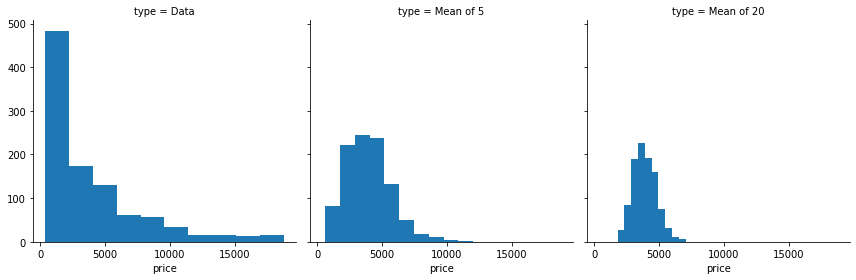

In [54]:
g = sns.FacetGrid(results, col="type",aspect=1,height=4)
g = g.map(plt.hist,"price")


In [55]:
g.savefig("images/sample_bell_shape.jpg")

## Bootstrap

In [5]:
from sklearn.utils import resample

In [59]:
results=[]

for n_repeat in range(10000):
    sample=resample(data_price,n_samples=3000)
    results.append(sample.median())

results=pd.Series(results)



In [60]:
print("Bootstrap Statistics:")
print(f"original:{data_price.median()}")
print(f"bias: {results.mean()-data_price.median()}")
print(f"std. error: {results.std()}")

Bootstrap Statistics:
original:2401.0
bias: 11.10759999999982
std. error: 70.41258456729553


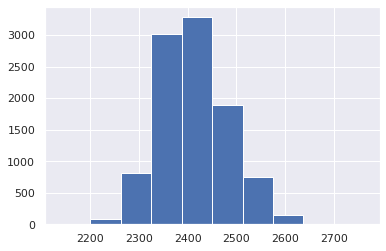

In [61]:
results.hist()

**Show confidence intervals**

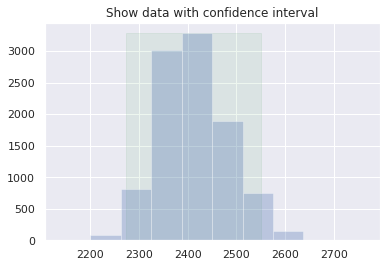

In [64]:
ci = norm(*norm.fit(results)).interval(0.95)  # fit a normal distribution and get 95% c.i.
height, bins, patches = plt.hist(results, alpha=0.3)
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='g', alpha=0.1)
plt.title("Show data with confidence interval")
plt.show()